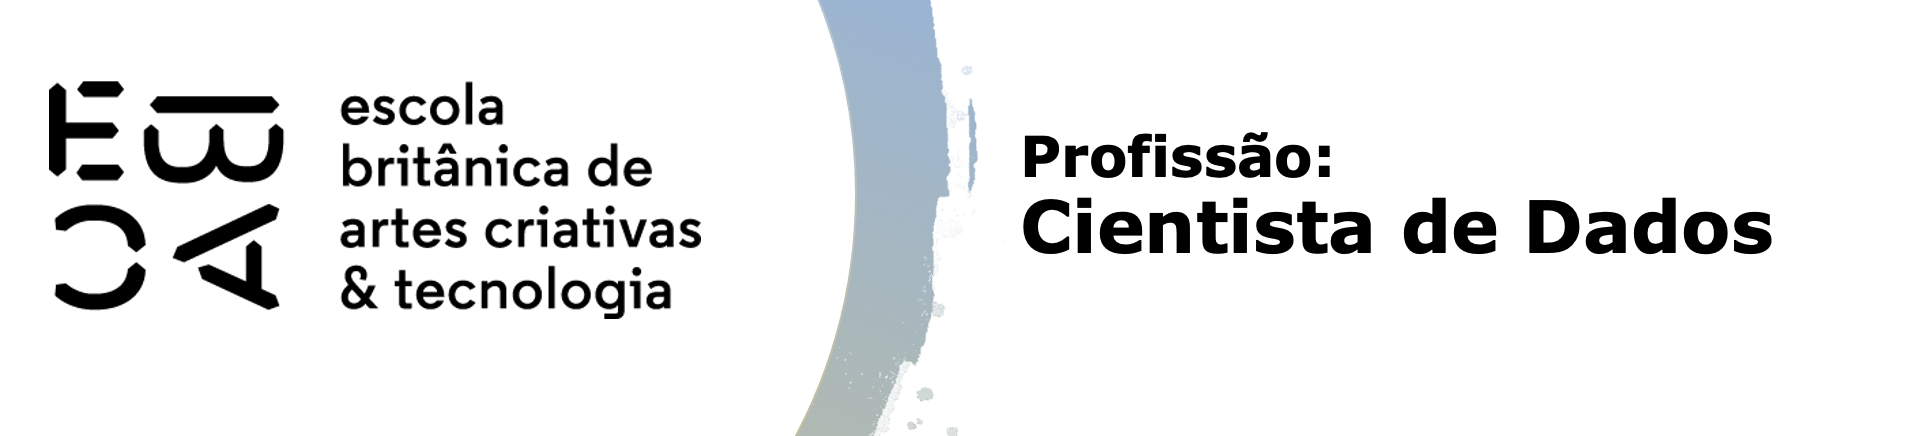

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [2]:
features = pd.read_csv(r".\UCI HAR Dataset\features.txt", delim_whitespace=True, header=None)
subject = pd.read_csv(r".\UCI HAR Dataset\train\subject_train.txt",delim_whitespace=True,header=None)
subject_test = pd.read_csv(r".\UCI HAR Dataset\test\subject_test.txt",delim_whitespace=True,header=None)

X_train = pd.read_csv(r".\UCI HAR Dataset\train\X_train.txt",delim_whitespace=True,header=None)
y_train = pd.read_csv(r".\UCI HAR Dataset\train\y_train.txt",delim_whitespace=True,header=None)

X_test = pd.read_csv(r".\UCI HAR Dataset\test\X_test.txt",delim_whitespace=True,header=None)
y_test = pd.read_csv(r".\UCI HAR Dataset\test\y_test.txt",delim_whitespace=True,header=None)

X_train.columns = features.values[:,1] ## obtendo apenas os valores da série (sem o índice)
X_test.columns = features.values[:,1] ## obtendo apenas os valores da série (sem o índice)


X_train['individuo'] = subject
X_test['individuo'] = subject_test

X_train.set_index([X_train.index, 'individuo'], drop=True)
X_test.set_index([X_test.index, 'individuo'], drop=True)

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,individuo,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [3]:
top_test = X_test[['tGravityAcc-min()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']]
top_train = X_train[['tGravityAcc-min()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']]


In [4]:
%%time
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20).fit(top_train, y_train)
path = clf.cost_complexity_pruning_path(top_test, y_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

CPU times: total: 46.9 ms
Wall time: 26.8 ms


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [5]:
grid_parametros = {'ccp_alpha':ccp_alphas}

In [6]:
%%time

grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(top_train, y_train) 

Fitting 10 folds for each of 53 candidates, totalling 530 fits
[CV 1/10; 1/53] START ccp_alpha=0.0.............................................
[CV 1/10; 1/53] END ..............ccp_alpha=0.0;, score=0.719 total time=   0.0s
[CV 2/10; 1/53] START ccp_alpha=0.0.............................................
[CV 2/10; 1/53] END ..............ccp_alpha=0.0;, score=0.736 total time=   0.0s
[CV 3/10; 1/53] START ccp_alpha=0.0.............................................
[CV 3/10; 1/53] END ..............ccp_alpha=0.0;, score=0.833 total time=   0.0s
[CV 4/10; 1/53] START ccp_alpha=0.0.............................................
[CV 4/10; 1/53] END ..............ccp_alpha=0.0;, score=0.727 total time=   0.0s
[CV 5/10; 1/53] START ccp_alpha=0.0.............................................
[CV 5/10; 1/53] END ..............ccp_alpha=0.0;, score=0.771 total time=   0.0s
[CV 6/10; 1/53] START ccp_alpha=0.0.............................................
[CV 6/10; 1/53] END ..............ccp_alpha=0.

[CV 10/10; 6/53] END ccp_alpha=8.965138046374953e-05;, score=0.784 total time=   0.0s
[CV 1/10; 7/53] START ccp_alpha=0.00012136815665828244..........................
[CV 1/10; 7/53] END ccp_alpha=0.00012136815665828244;, score=0.719 total time=   0.0s
[CV 2/10; 7/53] START ccp_alpha=0.00012136815665828244..........................
[CV 2/10; 7/53] END ccp_alpha=0.00012136815665828244;, score=0.736 total time=   0.0s
[CV 3/10; 7/53] START ccp_alpha=0.00012136815665828244..........................
[CV 3/10; 7/53] END ccp_alpha=0.00012136815665828244;, score=0.833 total time=   0.0s
[CV 4/10; 7/53] START ccp_alpha=0.00012136815665828244..........................
[CV 4/10; 7/53] END ccp_alpha=0.00012136815665828244;, score=0.732 total time=   0.0s
[CV 5/10; 7/53] START ccp_alpha=0.00012136815665828244..........................
[CV 5/10; 7/53] END ccp_alpha=0.00012136815665828244;, score=0.771 total time=   0.0s
[CV 6/10; 7/53] START ccp_alpha=0.00012136815665828244.........................

[CV 2/10; 12/53] END ccp_alpha=0.0002858186943697676;, score=0.735 total time=   0.0s
[CV 3/10; 12/53] START ccp_alpha=0.0002858186943697676..........................
[CV 3/10; 12/53] END ccp_alpha=0.0002858186943697676;, score=0.833 total time=   0.0s
[CV 4/10; 12/53] START ccp_alpha=0.0002858186943697676..........................
[CV 4/10; 12/53] END ccp_alpha=0.0002858186943697676;, score=0.732 total time=   0.0s
[CV 5/10; 12/53] START ccp_alpha=0.0002858186943697676..........................
[CV 5/10; 12/53] END ccp_alpha=0.0002858186943697676;, score=0.771 total time=   0.0s
[CV 6/10; 12/53] START ccp_alpha=0.0002858186943697676..........................
[CV 6/10; 12/53] END ccp_alpha=0.0002858186943697676;, score=0.770 total time=   0.0s
[CV 7/10; 12/53] START ccp_alpha=0.0002858186943697676..........................
[CV 7/10; 12/53] END ccp_alpha=0.0002858186943697676;, score=0.780 total time=   0.0s
[CV 8/10; 12/53] START ccp_alpha=0.0002858186943697676.........................

[CV 2/10; 17/53] END ccp_alpha=0.0007095202145746241;, score=0.734 total time=   0.0s
[CV 3/10; 17/53] START ccp_alpha=0.0007095202145746241..........................
[CV 3/10; 17/53] END ccp_alpha=0.0007095202145746241;, score=0.839 total time=   0.0s
[CV 4/10; 17/53] START ccp_alpha=0.0007095202145746241..........................
[CV 4/10; 17/53] END ccp_alpha=0.0007095202145746241;, score=0.748 total time=   0.0s
[CV 5/10; 17/53] START ccp_alpha=0.0007095202145746241..........................
[CV 5/10; 17/53] END ccp_alpha=0.0007095202145746241;, score=0.797 total time=   0.0s
[CV 6/10; 17/53] START ccp_alpha=0.0007095202145746241..........................
[CV 6/10; 17/53] END ccp_alpha=0.0007095202145746241;, score=0.766 total time=   0.0s
[CV 7/10; 17/53] START ccp_alpha=0.0007095202145746241..........................
[CV 7/10; 17/53] END ccp_alpha=0.0007095202145746241;, score=0.756 total time=   0.0s
[CV 8/10; 17/53] START ccp_alpha=0.0007095202145746241.........................

[CV 3/10; 22/53] END ccp_alpha=0.0008929625357485295;, score=0.850 total time=   0.0s
[CV 4/10; 22/53] START ccp_alpha=0.0008929625357485295..........................
[CV 4/10; 22/53] END ccp_alpha=0.0008929625357485295;, score=0.769 total time=   0.0s
[CV 5/10; 22/53] START ccp_alpha=0.0008929625357485295..........................
[CV 5/10; 22/53] END ccp_alpha=0.0008929625357485295;, score=0.797 total time=   0.0s
[CV 6/10; 22/53] START ccp_alpha=0.0008929625357485295..........................
[CV 6/10; 22/53] END ccp_alpha=0.0008929625357485295;, score=0.762 total time=   0.0s
[CV 7/10; 22/53] START ccp_alpha=0.0008929625357485295..........................
[CV 7/10; 22/53] END ccp_alpha=0.0008929625357485295;, score=0.790 total time=   0.0s
[CV 8/10; 22/53] START ccp_alpha=0.0008929625357485295..........................
[CV 8/10; 22/53] END ccp_alpha=0.0008929625357485295;, score=0.713 total time=   0.0s
[CV 9/10; 22/53] START ccp_alpha=0.0008929625357485295.........................

[CV 6/10; 27/53] END ccp_alpha=0.0015545559062067407;, score=0.793 total time=   0.0s
[CV 7/10; 27/53] START ccp_alpha=0.0015545559062067407..........................
[CV 7/10; 27/53] END ccp_alpha=0.0015545559062067407;, score=0.800 total time=   0.0s
[CV 8/10; 27/53] START ccp_alpha=0.0015545559062067407..........................
[CV 8/10; 27/53] END ccp_alpha=0.0015545559062067407;, score=0.725 total time=   0.0s
[CV 9/10; 27/53] START ccp_alpha=0.0015545559062067407..........................
[CV 9/10; 27/53] END ccp_alpha=0.0015545559062067407;, score=0.849 total time=   0.0s
[CV 10/10; 27/53] START ccp_alpha=0.0015545559062067407.........................
[CV 10/10; 27/53] END ccp_alpha=0.0015545559062067407;, score=0.797 total time=   0.0s
[CV 1/10; 28/53] START ccp_alpha=0.0015700892908369918..........................
[CV 1/10; 28/53] END ccp_alpha=0.0015700892908369918;, score=0.830 total time=   0.0s
[CV 2/10; 28/53] START ccp_alpha=0.0015700892908369918........................

[CV 8/10; 32/53] END ccp_alpha=0.0024480191691998877;, score=0.725 total time=   0.0s
[CV 9/10; 32/53] START ccp_alpha=0.0024480191691998877..........................
[CV 9/10; 32/53] END ccp_alpha=0.0024480191691998877;, score=0.873 total time=   0.0s
[CV 10/10; 32/53] START ccp_alpha=0.0024480191691998877.........................
[CV 10/10; 32/53] END ccp_alpha=0.0024480191691998877;, score=0.733 total time=   0.0s
[CV 1/10; 33/53] START ccp_alpha=0.0024888561557207638..........................
[CV 1/10; 33/53] END ccp_alpha=0.0024888561557207638;, score=0.827 total time=   0.0s
[CV 2/10; 33/53] START ccp_alpha=0.0024888561557207638..........................
[CV 2/10; 33/53] END ccp_alpha=0.0024888561557207638;, score=0.844 total time=   0.0s
[CV 3/10; 33/53] START ccp_alpha=0.0024888561557207638..........................
[CV 3/10; 33/53] END ccp_alpha=0.0024888561557207638;, score=0.873 total time=   0.0s
[CV 4/10; 33/53] START ccp_alpha=0.0024888561557207638........................

[CV 8/10; 37/53] END ccp_alpha=0.0035393072869935246;, score=0.785 total time=   0.0s
[CV 9/10; 37/53] START ccp_alpha=0.0035393072869935246..........................
[CV 9/10; 37/53] END ccp_alpha=0.0035393072869935246;, score=0.871 total time=   0.0s
[CV 10/10; 37/53] START ccp_alpha=0.0035393072869935246.........................
[CV 10/10; 37/53] END ccp_alpha=0.0035393072869935246;, score=0.714 total time=   0.0s
[CV 1/10; 38/53] START ccp_alpha=0.003645577872317663...........................
[CV 1/10; 38/53] END ccp_alpha=0.003645577872317663;, score=0.806 total time=   0.0s
[CV 2/10; 38/53] START ccp_alpha=0.003645577872317663...........................
[CV 2/10; 38/53] END ccp_alpha=0.003645577872317663;, score=0.853 total time=   0.0s
[CV 3/10; 38/53] START ccp_alpha=0.003645577872317663...........................
[CV 3/10; 38/53] END ccp_alpha=0.003645577872317663;, score=0.891 total time=   0.0s
[CV 4/10; 38/53] START ccp_alpha=0.003645577872317663...........................


[CV 9/10; 42/53] END ccp_alpha=0.006836984520925575;, score=0.871 total time=   0.0s
[CV 10/10; 42/53] START ccp_alpha=0.006836984520925575..........................
[CV 10/10; 42/53] END ccp_alpha=0.006836984520925575;, score=0.733 total time=   0.0s
[CV 1/10; 43/53] START ccp_alpha=0.00762086740475168............................
[CV 1/10; 43/53] END ccp_alpha=0.00762086740475168;, score=0.806 total time=   0.0s
[CV 2/10; 43/53] START ccp_alpha=0.00762086740475168............................
[CV 2/10; 43/53] END ccp_alpha=0.00762086740475168;, score=0.867 total time=   0.0s
[CV 3/10; 43/53] START ccp_alpha=0.00762086740475168............................
[CV 3/10; 43/53] END ccp_alpha=0.00762086740475168;, score=0.871 total time=   0.0s
[CV 4/10; 43/53] START ccp_alpha=0.00762086740475168............................
[CV 4/10; 43/53] END ccp_alpha=0.00762086740475168;, score=0.784 total time=   0.0s
[CV 5/10; 43/53] START ccp_alpha=0.00762086740475168............................
[CV 5/1

[CV 1/10; 48/53] END ccp_alpha=0.018986633882814352;, score=0.829 total time=   0.0s
[CV 2/10; 48/53] START ccp_alpha=0.018986633882814352...........................
[CV 2/10; 48/53] END ccp_alpha=0.018986633882814352;, score=0.818 total time=   0.0s
[CV 3/10; 48/53] START ccp_alpha=0.018986633882814352...........................
[CV 3/10; 48/53] END ccp_alpha=0.018986633882814352;, score=0.871 total time=   0.0s
[CV 4/10; 48/53] START ccp_alpha=0.018986633882814352...........................
[CV 4/10; 48/53] END ccp_alpha=0.018986633882814352;, score=0.781 total time=   0.0s
[CV 5/10; 48/53] START ccp_alpha=0.018986633882814352...........................
[CV 5/10; 48/53] END ccp_alpha=0.018986633882814352;, score=0.818 total time=   0.0s
[CV 6/10; 48/53] START ccp_alpha=0.018986633882814352...........................
[CV 6/10; 48/53] END ccp_alpha=0.018986633882814352;, score=0.833 total time=   0.0s
[CV 7/10; 48/53] START ccp_alpha=0.018986633882814352...........................
[CV 

[CV 3/10; 53/53] END ccp_alpha=0.1789914162845193;, score=0.380 total time=   0.0s
[CV 4/10; 53/53] START ccp_alpha=0.1789914162845193.............................
[CV 4/10; 53/53] END ccp_alpha=0.1789914162845193;, score=0.380 total time=   0.0s
[CV 5/10; 53/53] START ccp_alpha=0.1789914162845193.............................
[CV 5/10; 53/53] END ccp_alpha=0.1789914162845193;, score=0.378 total time=   0.0s
[CV 6/10; 53/53] START ccp_alpha=0.1789914162845193.............................
[CV 6/10; 53/53] END ccp_alpha=0.1789914162845193;, score=0.378 total time=   0.0s
[CV 7/10; 53/53] START ccp_alpha=0.1789914162845193.............................
[CV 7/10; 53/53] END ccp_alpha=0.1789914162845193;, score=0.378 total time=   0.0s
[CV 8/10; 53/53] START ccp_alpha=0.1789914162845193.............................
[CV 8/10; 53/53] END ccp_alpha=0.1789914162845193;, score=0.377 total time=   0.0s
[CV 9/10; 53/53] START ccp_alpha=0.1789914162845193.............................
[CV 9/10; 53/53]

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.58474100e-05, 1.81501093e-05, 2.06258275e-05,
       3.19713788e-05, 8.96513805e-05, 1.21368157e-04, 1.52653283e-04,
       1.59718241e-04, 2.70594797e-04, 2.71462504e-04, 2.85818694e-04,
       3.40466842e-04, 3.41934337e-04, 6.08219967e-04, 6.085...
       1.61344166e-03, 1.65242286e-03, 2.00725640e-03, 2.44801917e-03,
       2.48885616e-03, 2.96921364e-03, 3.30473634e-03, 3.41518950e-03,
       3.53930729e-03, 3.64557787e-03, 4.01299501e-03, 4.39460863e-03,
       6.08432368e-03, 6.83698452e-03, 7.62086740e-03, 1.18778641e-02,
       1.25648982e-02, 1.50665213e-02, 1.60819163e-02, 1.89866339e-02,
       3.55252262e-02, 4.44308686e-02, 7.71526857e-02, 1.66956515e-01,
       1.78991416e-01])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [7]:
grid.best_score_

0.8167794291629695

In [8]:
melhor_ccp = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.8167792443064181).fit(top_train, y_train)

In [9]:
clf.score(top_test, y_test)

0.7254835425856804

In [10]:
y_pred = melhor_ccp.predict(top_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   0,   0, 496],
       [  0,   0,   0,   0,   0, 471],
       [  0,   0,   0,   0,   0, 420],
       [  0,   0,   0,   0,   0, 491],
       [  0,   0,   0,   0,   0, 532],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

Acurácia: 18.22


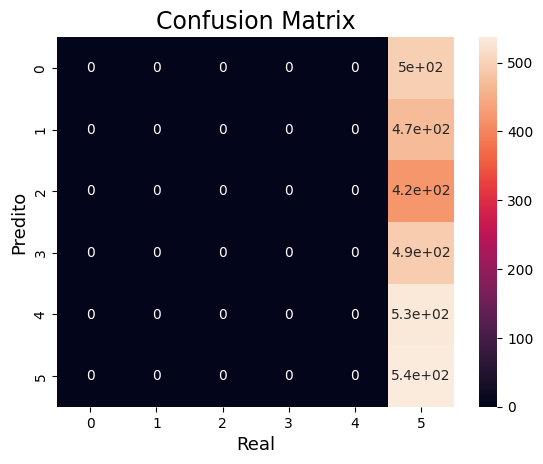

In [11]:
sns.heatmap(cm,annot=True)
plt.ylabel('Predito',fontsize=13)
plt.xlabel('Real',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
acuracia_teste = melhor_ccp.score(top_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

|Codigo | Atividade|
|-------|---------|
|1      |Andando|
|2      |Subindo escadas|
|3      |Descendo escadas|
|4      |Sentado|
|5      |Em pé|
|6      |Deitado|


In [12]:
# Define o limiar entre 4 e 5 - atividade de interesse 5 = atividade em pé 

y_treino = y_train.replace({5:1, 1:0,2:0, 3:0,4:0, 6:0})

# Cria a variável binária

y_treino


,0
0,1
1,1
2,1
3,1
4,1
...,...
7347,0
7348,0
7349,0
7350,0


In [13]:
X_treino = X_train.copy()

In [14]:
arvore = DecisionTreeClassifier(random_state=6969, max_depth=4, min_samples_leaf=20).fit(X_treino, y_treino)
best_variavel = pd.DataFrame({'Variavel': arvore.feature_importances_}, 
                             index=X_treino.columns).sort_values(by='Variavel', ascending=False)
best_variavel.head(3)

,Variavel
"angle(Y,gravityMean)",0.328048
fBodyAcc-skewness()-X,0.301851
"fBodyAccJerk-bandsEnergy()-1,16",0.130431


In [15]:
X_novoteste = X_test[['angle(Y,gravityMean)','fBodyAcc-skewness()-X','fBodyAccJerk-bandsEnergy()-1,16']]
X_novotreino = X_train[['angle(Y,gravityMean)','fBodyAcc-skewness()-X','fBodyAccJerk-bandsEnergy()-1,16']]

In [16]:
y_teste = y_test.replace({5:1, 1:0,2:0, 3:0,4:0, 6:0})

In [20]:
nova_arvore = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.8167792443064181).fit(X_novotreino, y_treino)
nova_acuracia = nova_arvore.score(X_novoteste, y_teste)

print(f'Acurácia: {nova_acuracia*100:.2f}')

Acurácia: 81.95
